# Explore mini cube

In [2]:
# imports
from importlib import reload
import numpy as np
import sys, os

from zdm import analyze_cube
from zdm import iteration as it
from zdm import io
from zdm.craco import loading


sys.path.append(os.path.abspath("../../Figures/py"))
import figs_zdm_H0_I

# Load

## LL 

In [3]:
scube = 'submini'
#scube = 'mini'

In [4]:
#npdict = np.load('Cubes/craco_mini_cube.npz')
npdict = np.load(f'Cubes/craco_{scube}_cube.npz')
list(npdict.keys())

['ll', 'lC', 'params', 'lEmax', 'sfr_n', 'alpha', 'gamma']

In [5]:
ll_cube = npdict['ll']
ll_cube.shape

(50, 20, 3, 10)

## lC

In [6]:
lC_cube = npdict['lC']
lC_cube.shape

(50, 20, 3, 10)

## Deal with NaN

In [7]:
ll_cube[np.isnan(ll_cube)] = -1e99

### Check

In [8]:
params = npdict['params']
params

array(['lEmax', 'sfr_n', 'alpha', 'gamma'], dtype='<U5')

## cube parameters

In [9]:
############## Load up ##############
pfile = f'Cubes/craco_{scube}_cube.json'
input_dict=io.process_jfile(pfile)

# Deconstruct the input_dict
state_dict, cube_dict, vparam_dict = it.parse_input_dict(input_dict)

# Run Bayes code -- need to simplify this

## Offset by max

In [10]:
ll_cube = ll_cube - np.max(ll_cube)
np.max(ll_cube)

0.0

In [11]:
reload(analyze_cube)
uvals,vectors,wvectors = analyze_cube.get_bayesian_data(ll_cube)

In [12]:
len(uvals)

4

In [13]:
uvals[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

# Plot

In [14]:
reload(analyze_cube)
analyze_cube.do_single_plots(uvals,vectors,wvectors, params, 
                             vparams_dict=vparam_dict, outdir='SubMini/')

----

# Check codes..

In [43]:
npdict = np.load('Cubes/craco_H0_Emax_cube.npz')

In [44]:
ll_cube_HE = npdict['ll']

In [45]:
params_HE = npdict['params']

In [46]:
############## Load up ##############
pfile = 'Cubes/craco_H0_Emax_cube.json'
input_dict=io.process_jfile(pfile)

# Deconstruct the input_dict
state_dict, cube_dict, vparam_dict_HE = it.parse_input_dict(input_dict)


In [47]:
ll_cube_HE = ll_cube_HE - np.max(ll_cube_HE)
uvals,vectors,wvectors = analyze_cube.get_bayesian_data(ll_cube_HE)

In [48]:
analyze_cube.do_single_plots(uvals,vectors,wvectors, params_HE, vparams_dict=vparam_dict_HE,
                            outdir='SingleHE/')

In [49]:
vparam_dict_HE

{'lEmax': {'DC': 'energy', 'min': 40.5, 'max': 42.5, 'n': 50},
 'H0': {'DC': 'cosmo', 'min': 55.0, 'max': 80.0, 'n': 50},
 'lC': {'DC': 'FRBdemo', 'min': -0.911, 'max': -0.911, 'n': -1}}

----

# Weird Emax

## Best

In [161]:
ibest_ll = np.argmax(ll_cube)
ibest_ll

18583762

In [162]:
best_ll = np.unravel_index(ibest_ll, ll_cube.shape)
best_ll

(49, 13, 2, 7, 10, 2, 2)

### vparams

In [163]:
vparam_dict

{'lEmax': {'DC': 'energy', 'min': 40.5, 'max': 42.5, 'n': 50},
 'H0': {'DC': 'cosmo', 'min': 55.0, 'max': 80.0, 'n': 25},
 'alpha': {'DC': 'energy', 'min': 0.2, 'max': 2.0, 'n': 3},
 'gamma': {'DC': 'energy', 'min': -0.5, 'max': -1.5, 'n': 10},
 'sfr_n': {'DC': 'FRBdemo', 'min': 0.0, 'max': 3.0, 'n': 20},
 'lmean': {'DC': 'host', 'min': 1.7, 'max': 2.5, 'n': 5},
 'lsigma': {'DC': 'host', 'min': 0.3, 'max': 0.7, 'n': 5},
 'lC': {'DC': 'FRBdemo', 'min': -0.911, 'max': -0.911, 'n': -1}}

In [166]:
reload(analyze_cube)
vparams = analyze_cube.gen_vparams(best_ll, vparam_dict)
vparams

{'lEmax': 42.5,
 'H0': 68.54166666666667,
 'alpha': 2.0,
 'gamma': -1.2777777777777777,
 'sfr_n': 1.5789473684210527,
 'lmean': 2.1,
 'lsigma': 0.5}

### $l_C$

In [170]:
lC_best = lC_cube[best_ll]
lC_best

6.65

## Generate and update grid

In [176]:
############## Initialise ##############
# ONLY FOR CRACO SO FAR
survey, grid = loading.survey_and_grid(
    state_dict=state_dict,
    survey_name='CRACO_alpha1_Planck18_Gamma',
    NFRB=100,
    iFRB=100)

Loading survey: CRACO_alpha1_Planck18_Gamma
FRB survey sucessfully initialised with  100  FRBs starting from 100
Initialised grid


In [177]:
grid.update(vparams)

## Show

/data/Projects/FRB_Software/zdm/zdm/figures.py:65: RuntimeWarning: divide by zero encountered in log10
  proc_grid = np.log10(proc_grid)


Host: mean=244.2435685362746, median=125.89254117941677


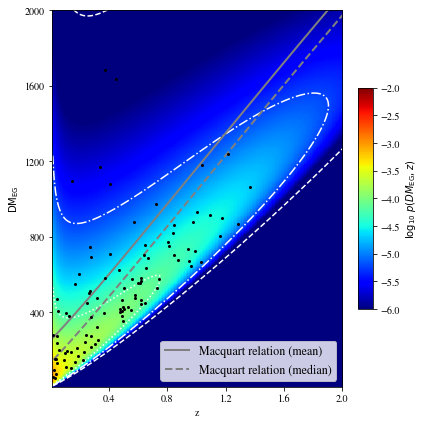

In [189]:
reload(figs_zdm_H0_I)
figs_zdm_H0_I.fig_craco_fiducial(grid=grid, survey=survey, show=True, figsize=(6,6),
                                vmnx=(-6.,-2.))

In [179]:
############## Initialise ##############
# ONLY FOR CRACO SO FAR
survey_true, grid_true = loading.survey_and_grid(
    state_dict=state_dict,
    survey_name='CRACO_alpha1_Planck18_Gamma',
    NFRB=100,
    iFRB=100)

Loading survey: CRACO_alpha1_Planck18_Gamma
FRB survey sucessfully initialised with  100  FRBs starting from 100
Initialised grid


/data/Projects/FRB_Software/zdm/zdm/figures.py:65: RuntimeWarning: divide by zero encountered in log10
  proc_grid = np.log10(proc_grid)


Host: mean=278.77755364720525, median=151.3561248436209


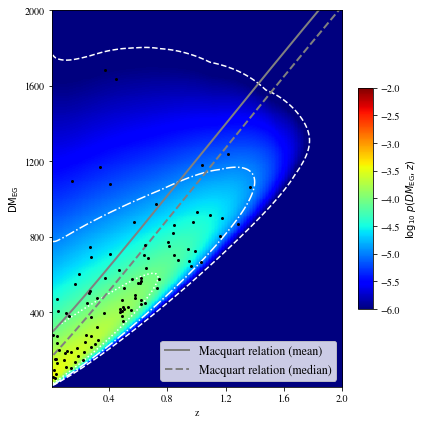

Wrote: fig_craco_fiducial.png


In [186]:
reload(figs_zdm_H0_I)
figs_zdm_H0_I.fig_craco_fiducial(grid=grid_true, survey=survey_true, show=True, figsize=(6,6),
                                vmnx=(-6.,-2.))